In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
import pandas as pd
hvlist = np.loadtxt('hvlist.txt')
f = open(f'namelist.txt', "r", encoding="utf-8")
str1 = f.read()
namelist = str1.split()
mcmcdir = 'mcmc1'
print(namelist)

['1994CB', '1996GQ', '2002LT24', '2003MA3', '2008NP3', '2009UX17', '2010AJ30', '2010BH115', '2010CA55', '2010CC55', '2010CN141', '2010CO1', '2010DG77', '2010DH77', '2010EX11', '2010FA81', '2010FC81', '2010FH81', '2010GP67', '2010GS7', '2010HW81', '2010HX107', '2010HZ104', '2010JN71', '2010JX16', '2010KP10', '2010KU7', '2010KX7', '2010LH14', '2010LJ68', '2010LK68', '2010LL68', '2010LV108', '2010NS36', '2010NY65', '2010OH126', '2010PU66', '2010PW58', '2010XP69', '2014FD7', '2015TF', '2016UH101', '2019DD2']


In [14]:
df0 = pd.read_excel(f'./ans_excel/{mcmcdir}.xlsx')
df = df0[['name','eta','wf','pv_wise','pv','D','Dup','Ddown','D_wise','D_wiseErr']]
df = df.sort_values('D',ascending = False)
df1 = df
for i in range(len(df)):
    if df.loc[i,'D_wise']>1000 or df.loc[i,'D']>1000:
        df1 = df1.drop(labels=i)
#df1 = df1.drop(labels=28)


In [15]:
def getratio(df):
    return (df['D']-df['D_wise'])*100/df['D_wise']
df1.loc[:,'delta/WISE'] = df1.apply(getratio,axis=1)
df1[:5]

,name,eta,wf,pv_wise,pv,D,Dup,Ddown,D_wise,D_wiseErr,delta/WISE
23,2010 KX7,0.17,0.49,0.2,0.01,500.0,500.0,500.0,212.0,19.0,135.849057
34,2014 FD7,1.90,0.50,0.2,0.04,349.9,350.6,349.3,360.0,150.0,-2.805556
16,2010 HW81,1.88,0.50,0.2,0.05,319.9,320.8,318.9,352.0,54.0,-9.119318
11,2010 DH77,1.11,0.50,0.2,0.05,313.2,313.8,312.7,628.0,17.0,-50.127389
9,2010 CO1,2.15,0.01,0.2,0.04,274.3,275.5,273.0,382.0,132.0,-28.193717


In [16]:
md = df1['D'].max()

/tmp/ipykernel_4087715/609825624.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x,y,xerr=[xerr1,xerr2],yerr=Wyerr,marker = '.',linestyle="none", fmt="o",color='b',ecolor='lightsteelblue', capsize=1.0)


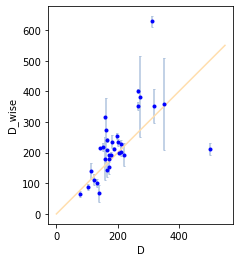

In [17]:
x = df1['D']
y = df1['D_wise']
#plt.plot(x,y,marker = '*')
plt.xlabel('D')
plt.ylabel('D_wise')
Wyerr = df1['D_wiseErr']
xerr1 = (df1['D']-df1['Ddown'])
xerr2 = (df1['Dup']-df1['D'])
plt.errorbar(x,y,xerr=[xerr1,xerr2],yerr=Wyerr,marker = '.',linestyle="none", fmt="o",color='b',ecolor='lightsteelblue', capsize=1.0)
#plt.errorbar(x,y,xerr=[xerr1,xerr2],linestyle="none")
plt.plot(np.linspace(0,md+50),np.linspace(0,md+50),'navajowhite')
ax = plt.gca()
ax.set_aspect(1)
plt.savefig(f'./ans_eps/ansfig{mcmcdir}.eps')